### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

Using TensorFlow backend.


### Load the MNIST dataset and split it into train and test data

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'Class 3')

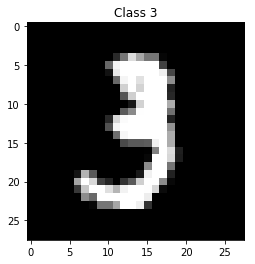

In [4]:

plt.imshow(X_train[10], cmap='gray')
plt.title('Class '+ str(y_train[10]))

In [5]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [6]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

### Design a ConvNet or CNN model

In [7]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers
# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

### Perform Data Augmentations (for location,scale and rotation invariance)

In [9]:

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [10]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [11]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
937/937 [==============================] - 242s 259ms/step - loss: 0.2120 - acc: 0.9319 - val_loss: 0.0351 - val_acc: 0.9877
Epoch 2/5
937/937 [==============================] - 223s 238ms/step - loss: 0.0631 - acc: 0.9810 - val_loss: 0.0263 - val_acc: 0.9909
Epoch 3/5
937/937 [==============================] - 231s 246ms/step - loss: 0.0502 - acc: 0.9848 - val_loss: 0.0188 - val_acc: 0.9932
Epoch 4/5
937/937 [==============================] - 223s 238ms/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0208 - val_acc: 0.9934
Epoch 5/5
937/937 [==============================] - 224s 239ms/step - loss: 0.0363 - acc: 0.9891 - val_loss: 0.0208 - val_acc: 0.9933


In [12]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 10s 1ms/step

Test accuracy:  0.9931


### View the predictions

In [14]:
import os
os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/Extras/DigitRecognition/Digit-Recognizer-master/Digit-Recognizer')
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

### Take input and display output using OpenCV

In [38]:
def get_img_contour_thresh(img):
    
    x, y, w, h = 0, 0, 300, 300
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    ret, thresh1 = cv2.threshold(blur, 175, 255, cv2.THRESH_BINARY_INV + 
      cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, 
      cv2.CHAIN_APPROX_SIMPLE)[-2:]
    return img, contours, thresh1

In [43]:
from keras import backend as K

cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    img, contours, thresh = get_img_contour_thresh(img)
    ans = ''

        
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(contour) > 500:
            x, y, w, h = cv2.boundingRect(contour)
            newImage = thresh[y:y + h, x:x + w]
            newImage = cv2.resize(newImage, (28, 28))
            newImage = np.array(newImage)
            newImage = newImage.astype('float32')
            newImage /= 255

            if K.image_data_format() == 'channels_first':
                newImage = newImage.reshape(1, 28, 28)
            else:
                newImage = newImage.reshape(28, 28, 1)
            newImage = np.expand_dims(newImage, axis=0)
            ans = model.predict(newImage).argmax()
            

    x, y, w, h = 0, 0, 300, 300
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    
    cv2.putText(img, "Neural Network says it is :  " + str(ans), (10, 350),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
    cv2.imshow("Frame", img)
    cv2.imshow("Contours", thresh)
    k = cv2.waitKey(10)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

## This code helps you classify different digits using Softmax Classifier.
1.  The CNN model is trained using MNIST dataset so that it can recognize hand written digits.
1.  A Softmax Classifier is used since it is a multiclass setting.
1.  Input is being taken via WebCam .
1.  The input is then provided to the model and the result is predicted and displayed using OpenCV.